In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/raw/startups.csv')

# Basic structure
print("Shape of the dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())

# Show first 5 rows
df.head()


Shape of the dataset: (50, 5)

Column Names: ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
print(df.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [4]:
print(df.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [5]:
print(df.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [7]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [9]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [10]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: >

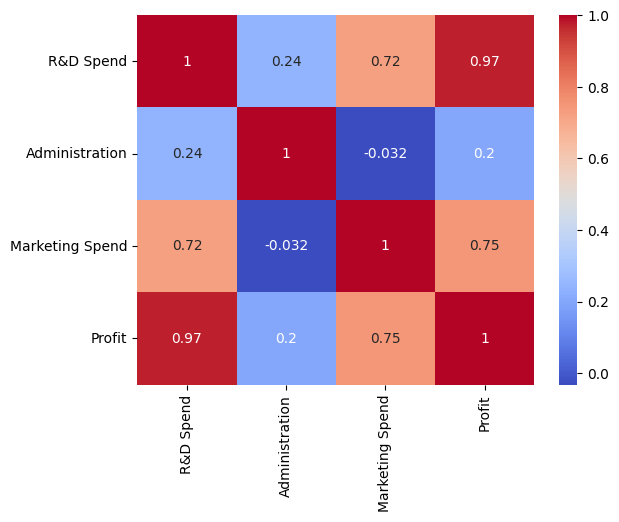

In [11]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Correlation Heatmap')

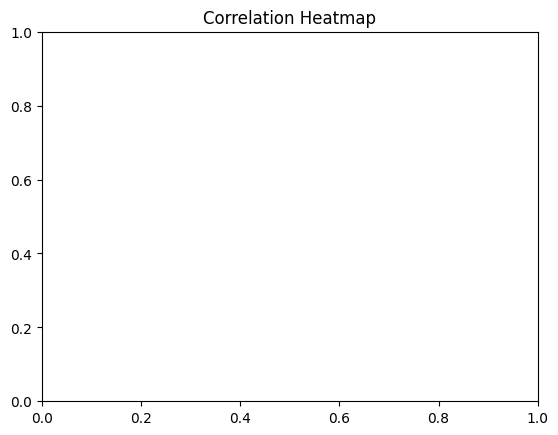

In [12]:
plt.title("Correlation Heatmap")

In [13]:
plt.show()

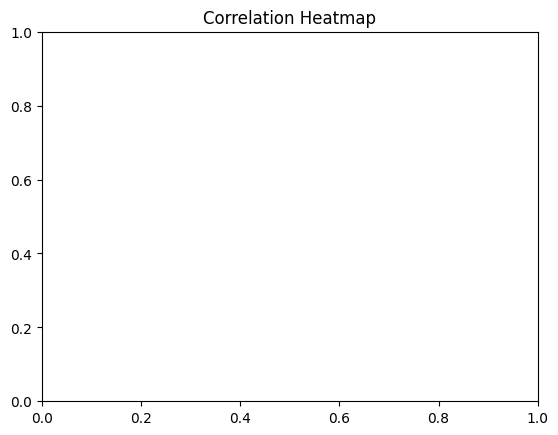

In [14]:
plt.title("Correlation Heatmap")
plt.show()

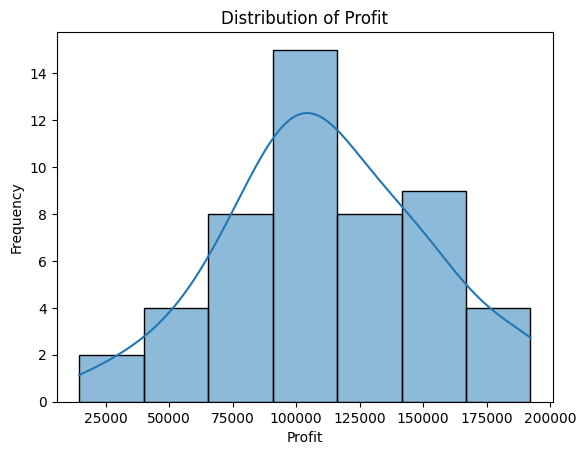

In [15]:
sns.histplot(df['Profit'], kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

In [16]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


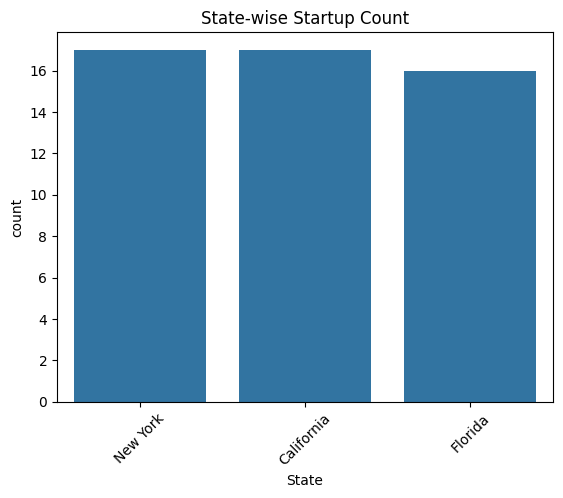

In [17]:
sns.countplot(x='State', data=df)
plt.xticks(rotation=45)
plt.title("State-wise Startup Count")
plt.show()

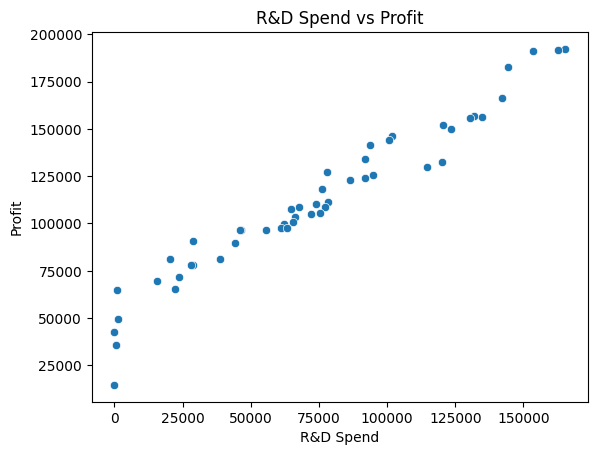

In [18]:
sns.scatterplot(x='R&D Spend', y='Profit', data=df)
plt.title("R&D Spend vs Profit")
plt.show()

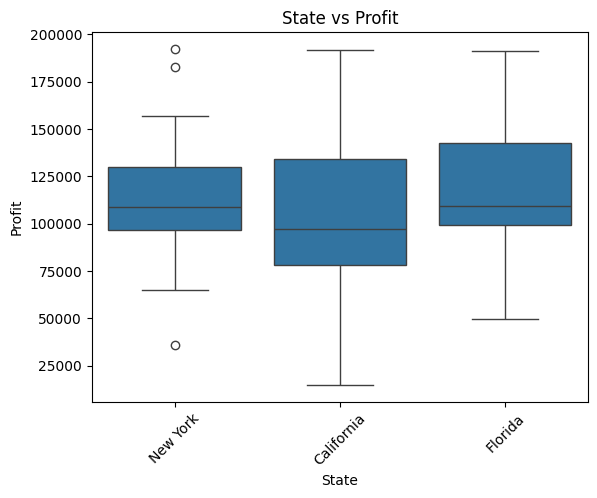

In [20]:
sns.boxplot(x='State', y='Profit', data=df)
plt.xticks(rotation=45)
plt.title("State vs Profit")
plt.show()

In [26]:
print(df.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')


In [27]:
print(df.columns.tolist())

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'State_Florida', 'State_New York']


In [28]:
X = df.drop('Profit', axis=1)
y = df['Profit']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.9347068473282423


In [32]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                 Coefficient
R&D Spend           0.773467
Administration      0.032885
Marketing Spend     0.036610
State_Florida    -959.284160
State_New York    699.369053


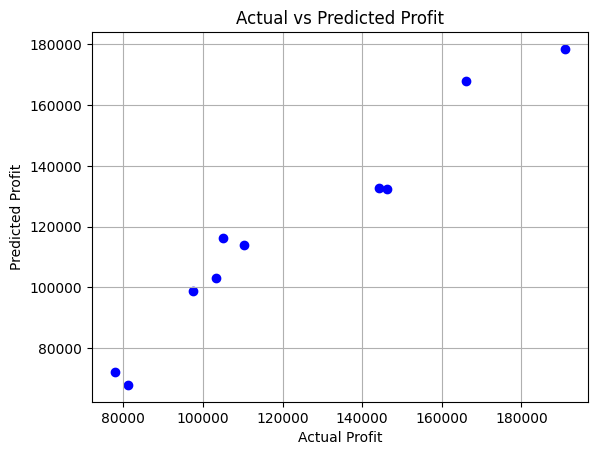

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.grid(True)
plt.show()

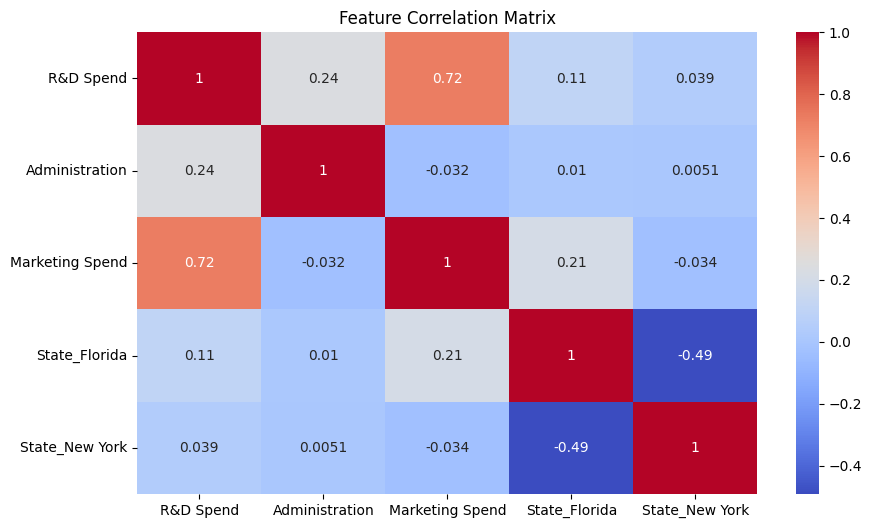

In [34]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [35]:
new_data = [[160000, 130000, 300000, 0, 1]]  # Example input (manual encoding for 'State')
new_prediction = regressor.predict(new_data)
print("Predicted Profit:", new_prediction[0])

Predicted Profit: 182266.29294636974


C:\Users\sabre\Downloads\startup-success-predictor\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
import pandas as pd

# Ensure column order matches your training data
new_data = pd.DataFrame([[160000, 130000, 300000, 0, 1]],
                        columns=X.columns)

# Make prediction
new_prediction = regressor.predict(new_data)
print("Predicted Profit:", new_prediction[0])

Predicted Profit: 182266.29294636974


In [37]:
import joblib
joblib.dump(regressor, 'startup_profit_model.pkl')

['startup_profit_model.pkl']

In [38]:
import joblib

# Load the model
loaded_model = joblib.load('startup_profit_model.pkl')

# Example input with column names
import pandas as pd
sample_input = pd.DataFrame([[160000, 130000, 300000, 0, 1]],
                            columns=['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York'])

# Make prediction
result = loaded_model.predict(sample_input)
print("Predicted Profit from loaded model:", result[0])

Predicted Profit from loaded model: 182266.29294636974


In [39]:
def predict_profit(input_data, model_path='startup_profit_model.pkl'):
    model = joblib.load(model_path)
    df_input = pd.DataFrame(input_data, columns=[
        'R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York'
    ])
    prediction = model.predict(df_input)
    return prediction[0]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [3]:
df = pd.read_csv('../data/raw/expanded_startup_data.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,Startup Age,Funding Amount,Founder Experience,Employee Count,Country,Industry Area,Profit
0,162867,80571,299432,4,4.08,2,414,India,Fintech,252038.9
1,151187,126165,236897,5,2.51,19,145,India,Edtech,208990.9
2,163016,104008,338521,3,2.98,8,439,UK,E-commerce,254990.2
3,167155,93075,256107,5,3.79,18,344,USA,Fintech,271172.3
4,145255,136403,281131,9,1.23,11,476,UK,Logistics,206784.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   R&D Spend           1000 non-null   int64  
 1   Administration      1000 non-null   int64  
 2   Marketing Spend     1000 non-null   int64  
 3   Startup Age         1000 non-null   int64  
 4   Funding Amount      1000 non-null   float64
 5   Founder Experience  1000 non-null   int64  
 6   Employee Count      1000 non-null   int64  
 7   Country             1000 non-null   object 
 8   Industry Area       1000 non-null   object 
 9   Profit              1000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 78.3+ KB


In [5]:
X = df.drop('Profit', axis=1)
y = df['Profit']

In [6]:
categorical_cols = ['Country', 'Industry Area']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [7]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['R&D Spend',
                                                   'Administration',
                                                   'Marketing Spend',
                                                   'Startup Age',
                                                   'Funding Amount',
                                                   'Founder Experience',
                                                   'Employee Count']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Country',
                                                   'Industry Area'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [10]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.7597315626588996
MSE: 336371812.35746616


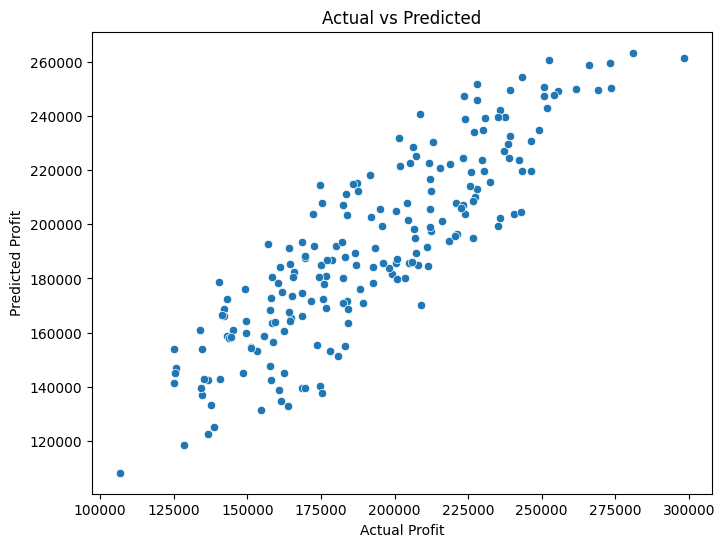

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted")
plt.show()

In [12]:
joblib.dump(model, '../models/expanded_startup_profit_model.pkl')

['../models/expanded_startup_profit_model.pkl']

In [13]:
import pandas as pd
import numpy as np
import random

# Number of synthetic entries
n = 100

# Generate synthetic early-stage startup data
synthetic_data = pd.DataFrame({
    "R&D Spend": np.random.uniform(5000, 20000, n),
    "Administration": np.random.uniform(1000, 10000, n),
    "Marketing Spend": np.random.uniform(2000, 15000, n),
    "Startup Age": [0] * n,
    "Funding Amount": np.random.uniform(20000, 500000, n),
    "Founder Experience": np.random.randint(0, 5, n),
    "Employee Count": np.random.randint(1, 10, n),
    "Country_India": [1]*n,
    "Country_USA": [0]*n,
    "Country_UK": [0]*n,
    "Country_EU": [0]*n,
    "Industry_Healthcare": [0]*n,
    "Industry_Finance": [0]*n,
    "Industry_Education": [0]*n,
    "Industry_E-commerce": [0]*n,
    # "Tech" is baseline if all 0
    "Profit": np.random.uniform(0, 100000, n)  # Simulated profit
})

# Save for training
synthetic_data.to_csv('../data/raw/early_stage_synthetic.csv', index=False)


In [14]:
existing_df = pd.read_csv('../data/raw/expanded_startup_data.csv')
synthetic_df = pd.read_csv('../data/raw/early_stage_synthetic.csv')

combined_df = pd.concat([existing_df, synthetic_df], ignore_index=True)
combined_df = combined_df.sample(frac=1).reset_index(drop=True)  # Shuffle

combined_df.to_csv('../data/raw/combined_dataset.csv', index=False)


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

# Filter early-stage
early_data = combined_df[combined_df['Startup Age'] == 0]

X = early_data.drop(columns=['Profit'])
y = early_data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

joblib.dump(model, '../models/early_stage_model.pkl')


['../models/early_stage_model.pkl']

In [16]:
growth_data = combined_df[combined_df['Startup Age'] > 0]
# Repeat the training procedure